In [1]:
# import scipy.io as sio
# from scipy.io import arff
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns
# import pandas as pd
# import csv
# import io
# import math
# import statistics
# from sklearn.decomposition import PCA
# from sklearn import tree
# from sklearn import ensemble
# from sklearn import neighbors
# from sklearn import svm
# from IPython.display import display
# from sklearn.model_selection import GridSearchCV
# from scipy.linalg import svd
# %config InlineBackend.figure_format = 'retina'

import pandas as pd

# 1. Preparing Dataset

Import `red_df` and `white_df` datasets

In [2]:
red_df = pd.read_csv("winequality_red.csv")
white_df = pd.read_csv("winequality_white.csv")

Check out the `red_df` and `white_df` datasets

In [3]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Concatenate `red_df` and `white_df` into a single dataset `dat`.

In [5]:
# Merge the `red whine` and `white wine` datasets together into a Dataframe
# red_df['type'] = 0
# white_df['type'] = 1
# dat = pd.concat([red_df, white_df])
dat = pd.concat([red_df])

Define custom feature titled `high_worth`, which will detail the case study in determining whether or not the restaurant should markup the price of the wine, provided certain mature qualities that our model will determine to be key features.

In [6]:
# concatenate custom feature
dat['high_worth'] = 1
dat.high_worth[dat['quality'] < 8] = 0

"number of features: " + str(len(dat.columns))

/Users/abipalli/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


'number of features: 13'

In [7]:
Y_features = ['quality','high_worth']
X_features = [c for c in dat.columns.tolist() if c not in Y_features]

Set what type of predictor (`QUALITY` or `HIGH WORTH`) we want the model to train and fit for. <br>

`QUALITY` will have the predictor fit the model to determine a wine's quality score. <br>
`HIGH WORTH` will determine whether or not the restaurant should consider mark up the price of the wine based on maturing parameters.

In [8]:
predictor = 'QUALITY'

In [9]:
if predictor.lower() == 'quality':
    Y_features = ['quality']
else:
    Y_features = ['high_worth']

In [10]:
print("Y_features", len(Y_features), Y_features)
print("X_features", len(X_features), X_features)

Y_features 1 ['quality']
X_features 11 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


## Artifacts:
- `red_df`: pandas DataFrame of red wine
- `white_df`: pandas DataFrame of white wine
- `X_features`: independent features of table
- `Y_features`: dependent feature to be predicted by the model

# 2. Explore the Dataset

## 2.1 Understanding the Features
- `fixed acidity`: most acids involved with wine or fixed or nonvolatile (do not evaporate friendly)
- `volatile acidity`: the amount of acetic acid in wine, which at high levels can lead to an unpleasant vinegar taste
- `citric acid`: found in small quantities, citric acid can add 'freshness' and flavor to wines
- `residual sugar`: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 fram/liter and wines with greater than 45 grams/liter are considered sweet
- `chlorides`: the amount of salt in the wine
- `free sulfur dioxide`: the free form of SO2 exists in equilibtrium between molecular SO2 (dissolved gas) and bisulfite ion; it prevents microbial groth and the oxidation of wine
- `total sulfur dioxide`: amount of free and bound forms of SO2; in low concentrations, SO2 is mostly undetectable in wine, but becomes evident in the smell and taste at free SO2 concetrations over 50 ppm
- `density`: the density of water is close to that of water depending on the percent alcohol and sugar content
- `pH`: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 pH
- `sulfates`: wine addiitve that contributes to SO2 contentrations in the wine
- `alchohol`: the alcohol content concentration of the wine
<br><br>
- `quality`: score between 0 to 10
- `high_worth`: custom score annotated to wines that perform a `quality` score ≥ 8, provided that average wines score ~7

## 2.2 Feature correlations to `quality`
First attempted to disect the relative correlations between the different parameters collected about each wine and how it generally influences the target variable `quality`.

In [11]:
dat.corr()[['quality']].drop([c for c in dat.columns if c not in X_features])

,quality
fixed acidity,0.124052
volatile acidity,-0.390558
citric acid,0.226373
residual sugar,0.013732
chlorides,-0.128907
free sulfur dioxide,-0.050656
total sulfur dioxide,-0.185100
density,-0.174919
pH,-0.057731
sulphates,0.251397


In [12]:
# Separating out the features
x = dat.loc[:, X_features].values
# Separating out the target
y = dat.loc[:, Y_features].values

# 3. Determine Optimal `k` value for PCA

In [13]:
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from statsmodels.tools.tools import add_constant

In [14]:
def split_and_standardize(x, y, test_size):
    ###
    # Split the data
    ###
    # test_size: what proportion of original data is used for test set
    train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=1/5, random_state=0)

    ###
    # Standardize datasets
    ###
    scaler = StandardScaler()

    # Fit on training set only.
    scaler.fit(train_X)

    # Apply transform to both the training set and the test set.
    train_X= scaler.transform(train_X)
    test_X = scaler.transform(test_X)

    # Convert all sets into pandas Dataframes
    train_X = pd.DataFrame(train_X, columns=X_features)
    test_X = pd.DataFrame(test_X, columns=X_features)

    train_y = pd.DataFrame(train_y, columns=Y_features)
    test_y = pd.DataFrame(test_y, columns=Y_features)
        
    return train_X, test_X, train_y, test_y

In [15]:
k_costs = {}

for k in range(len(X_features), 0, -1):
    k_vals = {}
    for k_neighs in range(5,100,10):
        ###
        # Split the data
        ###
        # test_size: what proportion of original data is used for test set
        train_X, test_X, train_y, test_y = split_and_standardize(x, y, test_size=2/5)

        ###
        # Compute the k-best Principle Components (Decomponsition) 
        ###
        # Construct PC decomposition to choose k-best axes
        pca = PCA(n_components=k, svd_solver='full')
        # Train on just the training dataset
        pca.fit(train_X)

        # Use trained PCA to transform train+test datasets
        train_X = pca.transform(train_X)
        test_X = pca.transform(test_X)

        
        ####
        ## Train Mutliple Classifiers and Aggregate their Performances ... 
        ####
        
        ###
        # Train KNeighborsClassifier
        ###
        # Train linear regression on training set projections on k-best axes        
        kn_reg = KNeighborsClassifier().fit(train_X, train_y)

        # Compute predictions on test set
        pred_y = kn_reg.predict(test_X).round()

        # Make predictions categorical
        pred_y = pd.DataFrame(pred_y, columns=Y_features)

        k_vals['k_neighs-mse'] = mean_squared_error(pred_y, test_y)
        k_vals['k_neighs-acc'] = accuracy_score(pred_y, test_y)
        
        
        ###
        # Train Linear Regression
        ###
        lin_reg = LinearRegression().fit(train_X, train_y)
        pred_y = lin_reg.predict(test_X).round()
        pred_y = pd.DataFrame(pred_y, columns=Y_features)
        k_vals['lin_reg-mse'] = mean_squared_error(pred_y, test_y)
        k_vals['lin_reg-acc'] = accuracy_score(pred_y, test_y)        
        
        
        del pca

        
    k_costs[k] = k_vals

/Users/abipalli/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/abipalli/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/abipalli/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/abipalli/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

/Users/abipalli/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/abipalli/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/abipalli/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/abipalli/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

/Users/abipalli/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/abipalli/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/abipalli/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/abipalli/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

/Users/abipalli/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/abipalli/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/abipalli/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/abipalli/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [16]:
for k,v in k_costs.items():
    print(k, v)

11 {'k_neighs-mse': 0.6, 'k_neighs-acc': 0.60625, 'lin_reg-mse': 0.453125, 'lin_reg-acc': 0.63125}
10 {'k_neighs-mse': 0.60625, 'k_neighs-acc': 0.59375, 'lin_reg-mse': 0.453125, 'lin_reg-acc': 0.63125}
9 {'k_neighs-mse': 0.609375, 'k_neighs-acc': 0.590625, 'lin_reg-mse': 0.43125, 'lin_reg-acc': 0.653125}
8 {'k_neighs-mse': 0.61875, 'k_neighs-acc': 0.575, 'lin_reg-mse': 0.440625, 'lin_reg-acc': 0.64375}
7 {'k_neighs-mse': 0.625, 'k_neighs-acc': 0.603125, 'lin_reg-mse': 0.453125, 'lin_reg-acc': 0.621875}
6 {'k_neighs-mse': 0.6375, 'k_neighs-acc': 0.5875, 'lin_reg-mse': 0.45625, 'lin_reg-acc': 0.61875}
5 {'k_neighs-mse': 0.634375, 'k_neighs-acc': 0.590625, 'lin_reg-mse': 0.45, 'lin_reg-acc': 0.625}
4 {'k_neighs-mse': 0.596875, 'k_neighs-acc': 0.603125, 'lin_reg-mse': 0.478125, 'lin_reg-acc': 0.615625}
3 {'k_neighs-mse': 0.653125, 'k_neighs-acc': 0.55625, 'lin_reg-mse': 0.48125, 'lin_reg-acc': 0.6125}
2 {'k_neighs-mse': 0.709375, 'k_neighs-acc': 0.496875, 'lin_reg-mse': 0.621875, 'lin_reg-

In [20]:
k_dat = pd.DataFrame(k_costs)
k_dat.style.a

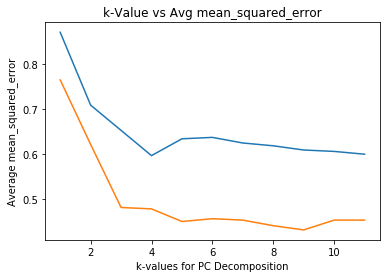

In [18]:
import matplotlib.pyplot as plt

# plot average mean_squared_error for specific k-value

fig = plt.figure()
plt.title("k-Value vs Avg mean_squared_error")
plt.xlabel("k-values for PC Decomposition")
plt.ylabel("Average mean_squared_error")

for plot in ['k_neighs-mse', 'lin_reg-mse']:
    plt.plot(k_costs.keys(), [k_costs[k][plot] for k in k_costs.keys()])
   
plt.show()

In [ ]:
fig = plt.figure()
plt.title("k-Value vs Avg mean_squared_error")
plt.xlabel("k-values for PC Decomposition")
plt.ylabel("Average mean_squared_error")

for plot in ['k_neighs-acc', 'lin_reg-acc']:
    plt.plot(k_costs.keys(), [k_costs[k][plot] for k in k_costs.keys()])
   
plt.show()

It appears that the optimal k-value (while preventing overfitting the model to the training data) is `k = 4`.

## Artifacts:
Prepares the following:
- `opt_k`:
- `pca`:
- `reg`: